In [24]:
import pandas as pd 
import numpy as np 

X = pd.read_csv('../Boosts/Datasets/X.csv')
y = pd.read_csv('../Boosts/Datasets/y.csv')

In [25]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=123)

In [26]:
import joblib 

rf = joblib.load('../Boosts/SavedModels/random_forest_model.joblib')
rf

RandomForestClassifier(bootstrap=False, class_weight={0: 2, 1: 3},
                       n_estimators=175)

In [27]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.load_model('../Boosts/SavedModels/XGBoost_Model.json')

In [30]:
xgb_pred = xgb.predict(X)
rf_pred = rf.predict(X)
combined_pred = np.vstack((xgb_pred, rf_pred)).T

In [31]:
from sklearn.ensemble import RandomForestClassifier

stacked_model = RandomForestClassifier(n_estimators=100)
stacked_model.fit(combined_pred, np.ravel(y))

RandomForestClassifier()

In [36]:
stacked_pred = stacked_model.predict(combined_pred)
accuracy = accuracy_score(y, stacked_pred)
print("Stacked model accuracy:", accuracy)

Stacked model accuracy: 1.0


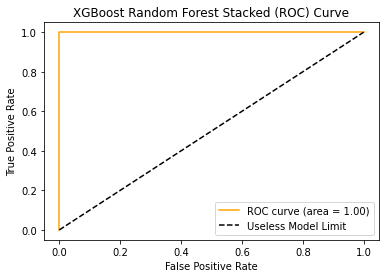

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt 

%matplotlib inline

fpr, tpr, thresholds = roc_curve(y, stacked_pred)
auc = roc_auc_score(y, stacked_pred)
class_report = pd.DataFrame(classification_report(y, stacked_pred, output_dict=True))

plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:0.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Useless Model Limit')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Random Forest Stacked (ROC) Curve')
plt.legend(loc="lower right")

plt.savefig('../Images/Stacked_XGB_RF_ROC.png')
plt.show()

In [39]:
import joblib 

joblib.dump(stacked_model, "../Boosts/BoostedModels/rf_xgboost.joblib")

['../Boosts/BoostedModels/rf_xgboost.joblib']